In [2]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

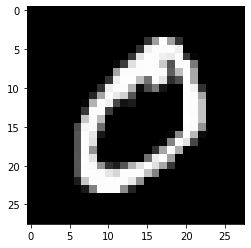

0


In [4]:
plt.imshow(x_train[1],cmap="gray")
plt.show()
print(y_train[1])


In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
model = Sequential()
layer_1 = Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = Conv2D(64, kernel_size=3, activation='relu')
layer_3 = Flatten()
layer_4 = Dense(10, activation='softmax')
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 99s 2ms/step - loss: 0.3322 - accuracy: 0.9537 - val_loss: 0.1001 - val_accuracy: 0.9693
Epoch 2/3
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0652 - accuracy: 0.9803 - val_loss: 0.0767 - val_accuracy: 0.9757
Epoch 3/3
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0444 - accuracy: 0.9864 - val_loss: 0.0876 - val_accuracy: 0.9768


In [12]:
example = x_train[1]
prediction = model.predict(example.reshape(1, 28, 28, 1))

In [13]:
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))

Prediction (Softmax) from the neural network:

 [[9.99992013e-01 8.97805615e-12 2.23478224e-07 1.10883705e-10
  4.28497038e-12 1.47154919e-08 6.75601495e-06 2.76204809e-10
  1.83691128e-07 6.95101335e-07]]


In [14]:
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))



Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]




--------- Prediction --------- 




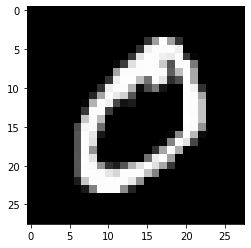



Final Output: 0


In [15]:
print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))

In [21]:
image = cv2.imread('./3.jpg')

In [22]:
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

In [23]:
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
_, contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)




----------------Contoured Image--------------------


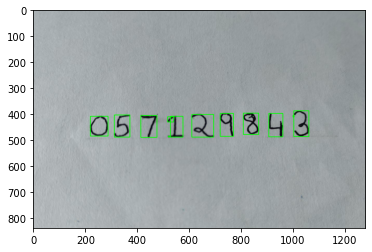

In [24]:
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    digit = thresh[y:y+h, x:x+w]
    resized_digit = cv2.resize(digit, (18,18))
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    preprocessed_digits.append(padded_digit)

    
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)



---------------------------------------


=========PREDICTION============ 




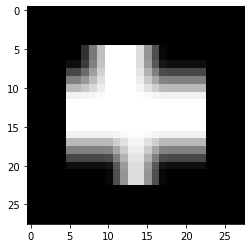



Final Output: 0

Prediction (Softmax) from the neural network:

 [[2.64646083e-01 1.94031483e-04 1.49443476e-05 4.99043126e-05
  2.52871931e-01 3.59113934e-03 2.52065450e-01 1.07047364e-01
  3.38235572e-02 8.56955647e-02]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




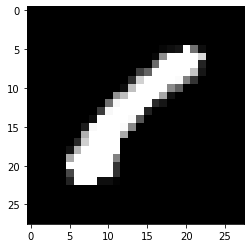



Final Output: 0

Prediction (Softmax) from the neural network:

 [[7.0094329e-01 5.7284717e-02 3.6361839e-03 2.1471681e-06 2.3726252e-01
  6.2477664e-04 7.9951118e-05 1.8965265e-10 1.5678216e-04 9.7655702e-06]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




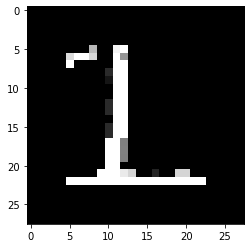



Final Output: 4

Prediction (Softmax) from the neural network:

 [[1.7163670e-08 1.1803186e-07 2.9523397e-02 6.3786283e-06 9.7047013e-01
  2.1181631e-10 4.5747759e-13 2.2553170e-12 1.5970888e-12 2.6691978e-16]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




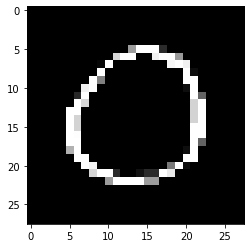



Final Output: 0

Prediction (Softmax) from the neural network:

 [[9.99932170e-01 4.03301416e-13 1.33686795e-08 6.06342962e-11
  4.94208522e-14 3.29478334e-10 6.76540731e-05 3.28215385e-12
  1.78362569e-08 1.29459877e-07]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




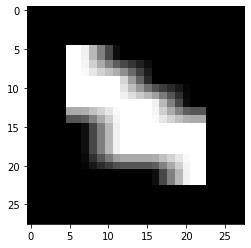



Final Output: 4

Prediction (Softmax) from the neural network:

 [[4.3598462e-07 1.0838476e-06 1.1968690e-06 1.8646520e-07 8.6491686e-01
  1.8444570e-02 1.1652072e-01 8.8091991e-05 2.6853475e-05 1.1452456e-07]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




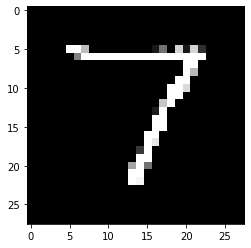



Final Output: 7

Prediction (Softmax) from the neural network:

 [[4.3800447e-16 2.2269816e-07 2.0312511e-07 3.5764200e-10 1.3735184e-05
  1.6718573e-17 6.9220963e-18 9.9998581e-01 2.4862389e-12 3.0863046e-20]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




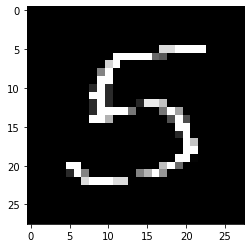



Final Output: 5

Prediction (Softmax) from the neural network:

 [[1.3775725e-17 6.3897597e-18 1.9569034e-16 3.6265525e-11 1.1734020e-17
  1.0000000e+00 2.1602473e-13 1.2893926e-19 1.8224924e-14 2.0617743e-17]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




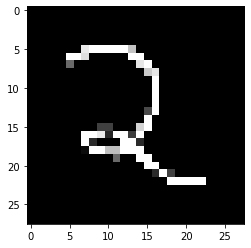



Final Output: 2

Prediction (Softmax) from the neural network:

 [[6.2282047e-19 7.7314840e-20 1.0000000e+00 1.7702774e-08 6.6081728e-12
  1.2619285e-19 1.7334738e-18 5.7436109e-09 3.5709048e-16 1.5726080e-16]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




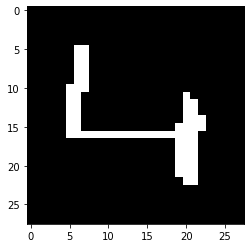



Final Output: 4

Prediction (Softmax) from the neural network:

 [[1.4389771e-13 3.1310141e-12 1.7818479e-13 2.5298907e-20 9.9999797e-01
  1.0643306e-10 1.9638078e-06 1.0021673e-07 2.8517794e-11 2.0060575e-10]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




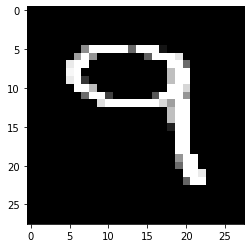



Final Output: 2

Prediction (Softmax) from the neural network:

 [[8.2562505e-11 1.1404998e-08 3.8129389e-01 3.2986671e-01 1.3454239e-02
  1.5488941e-07 6.0721935e-14 2.5923342e-01 1.6117988e-02 3.3619584e-05]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




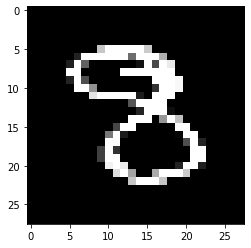



Final Output: 8

Prediction (Softmax) from the neural network:

 [[1.09912256e-13 2.04350447e-12 4.03529586e-04 1.16784655e-01
  2.01052485e-17 1.30235633e-12 2.95550442e-16 4.76434820e-12
  8.82811844e-01 4.39235169e-14]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




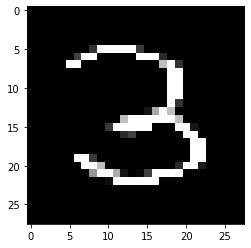



Final Output: 3

Prediction (Softmax) from the neural network:

 [[2.2625379e-18 8.9320338e-19 9.2108739e-06 9.9999082e-01 1.5081723e-15
  7.8578257e-16 6.0100460e-23 1.1118918e-14 2.4632546e-12 9.0848024e-14]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




In [25]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")